# INF4039 Deep Learning Systems / Giliojo mokymo sistemų taikymai
**LAB1** 
**Single layer perceptron**

## Data

Data – artificially generated two-dimensional Gaussian data sets: class1 and class 2.  
 
Single-layer perceptron will be trained to discriminate between these two classes.  

Each class is decribed by a mean vector and covariance matrix:  

In [ ]:
mean1 = np.array([-0.5, 1])  #  two-dimensional mean vector [x1 x2] of class 1
mean2 = np.array([0.5, 0])   #  two-dimensional mean vector [x1 x2] of class 2 
var1=1 # variance of x1 feature (the same for both classes A and B)
var2=2 # variance of x2 feature (the same for both classes A and B)
cor12=0.8 #correlation coefficient between features x1 and x2

A size of a training set is defined (equal for each class). 

In [ ]:
N_train=100 # number of training samples
N_test=100 # number of testing samples

**Training set** is denoted: data_train1, data_train2.  
**Test set** is denoted: data_test1, data_test2.  
**Targets**: 
targets_train1 - zeros, targets_train2 - ones  
targets_test1 - zeros, targets_test2 - ones  

## Training and testing of a single layer perceptron

Parameters for training:

In [ ]:
#parameters for perceptron training
niu = 0.2 # learning Rate
epochs = 200

To train and test a perceptron we will use the following functions:

In [ ]:
# perceptron call
perceptron = Perceptron(data_train, targets_train) 

#training
mse=perceptron.train(epochs, niu) 

#training errors
error_train, error_train_percent]=perceptron.errors(data_train, targets_train)
    
#testing errors
[error_test, error_test_percent]=perceptron.errors(data_test, targets_test)

The training is implemented in the method  
    **def train(self, its, niu):**

Analyze and understand the code and all methods.
Pay attention to the training gradient descent procedure: 

In [ ]:
def train(self, its, niu):
...

for i in range(N): #over the samples 
     cost_prime = 2*(activation[i] - self.targets[i])
     #weight change for a given sample
     for j in range(p+1): #over the features
     delta_weights[j][i] = cost_prime * inputs1[i][j] * 
self.sigmoid_deriv(z[i])
                    
     #average of the weight change over the learning samples and transpose
     delta_avg = np.array([np.average(delta_weights, axis=1)]).T
            
     #weight update 
     self.weights = self.weights - niu * delta_avg

At the end the figures are generated to present the mse, classification error during training, data and decision boundary, neuron output for data,  mse surface as a function of weights. Training and classification errors are printed.

## Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
class Perceptron():
    def __init__(self,inputs, targets):
        self.inputs=inputs
        self.targets=targets
        [N,p]=self.inputs.shape #N - number of training samples, p - number of features
        #random weight initialization
        self.weights = np.random.rand(p+1,1)

    def sigmoid(self, x):
        #sigmoidal activation function
        return (1 / (1 + np.exp(-x)))

    def sigmoid_deriv(self, x):
        #derivative of sigmoidal activation function
        return np.exp(-x)/((1 + np.exp(-x))**2)

    def train(self, its, niu):
        #training
        [N,p]=self.inputs.shape #N - number of training samples, p - number of features
        #weight change initialization with zeros
        delta_weights = np.zeros((p+1,N))
        #mean square error vector initialization with zeros (for plotting)
        self.mse=np.zeros(its)
        #training iteration vector (for plotting)
        self.T=list(range(its)) 
        
        for iteration in (range(its)):
            #adding the column of ones to the data matrix (for the bias weight w0)
            one_column=np.ones((N,1))
            inputs1=np.hstack((one_column, self.inputs)) #hstack - function to combine matrices
            
            #output = inputs * weights
            z = np.dot(inputs1, self.weights)
            
            #output
            activation = self.sigmoid(z)

            #mean square error for plotting
            self.mse[iteration] =sum((activation - self.targets)**2)/N 
      
            # back propagation
            for i in range(N): #over the samples 
                #square error: (output-targets)* (output-targets)
                #cost = (activation[i] - real_outputs[i])**2
                #derivative of the cost for a given training sample i
                cost_prime = 2*(activation[i] - self.targets[i])
                #weight change for a given sample
                for j in range(p+1): #over the features
                    delta_weights[j][i] = cost_prime * inputs1[i][j] * self.sigmoid_deriv(z[i])
                    
                    
            #average of the weight change over the learning samples and transpose
            delta_avg = np.array([np.average(delta_weights, axis=1)]).T
            
            #weight update 
            self.weights = self.weights - niu * delta_avg
         
            
    def output(self, inputs):
        inputs1=np.append([1], inputs) #hstack - function to combine matrices
        #output for the inputs
        return self.sigmoid(np.dot(inputs1, self.weights))
    
    
    def errors(self, data_test, targets_test):
        #testing perceptron
        output_test = []
        error_test = 0
        #len(testing_data) -  returns the number of items (length) in an object.
        #range(0, n) generates integers from 0 up to n, but not including n 
        N_test=len(data_test)
        
        for i in range(N_test):
            #one testing sample
            x_test = data_test[i]
            #output for the testing sample
            out = perceptron.output(x_test)
            #append to the output list
            output_test.append(out.tolist())
            #round output to 0 or 1: allocate a class to every test sample
            #np.rint: rounds to the nearest integer
            #np.ravel:a 1-D array, containing the elements of the input, is returned
            class_test=np.ravel(np.rint(output_test))
            #convert to integer
            class_test=class_test.astype(int)
            #make test targets as 1-D array ([a,b]=targets_test.shape)
            targets_test_1D=np.ravel(targets_test)
            #calculate errors: difference between class predicted and target should be zero (small)
            if abs (class_test[i]-targets_test_1D[i]) > 0.01:
                #if class_test[i] !=targets_test_1D[i]:
                    error_test+= 1
            
        error_test_percent= error_test/N_test*100         
        #print results
        print("Class observed")    
        print(targets_test_1D) # Class observed
        print("Class predicted")
        print(class_test) # Class predicted
        return error_test, error_test_percent 
               
    
    #plot mse and data
    def plot_mse(self):
        fig = plt.figure(figsize=(6,4)) # indicating figure size
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(self.T, self.mse, c='k')
        ax.set_title('Mean square error mse', style='italic')
        ax.set_ylabel('mse', style='italic')
        ax.set_xlabel('iterations', style='italic')
        plt.tight_layout()
        plt.show()
        fig.savefig('perceptron_mse.png')
        
    def plot_data(self, data1, data2):
        #finding separating plane
        #min and max x1
        x1_min=min(np.append(data_train1[:,0],data_train2[:,0] ))
        x1_max=max(np.append(data_train1[:,0],data_train2[:,0] ))
        #calculating the corresponding x2 using the weights 
        x2_x1_min=(-self.weights[0]-self.weights[1]*x1_min)/self.weights[2]
        x2_x1_max=(-self.weights[0]-self.weights[1]*x1_max)/self.weights[2]
        #min and max x2
        x2_min=min(np.append(data_train1[:,1],data_train2[:,1] ))
        x2_max=max(np.append(data_train1[:,1],data_train2[:,1] ))
        
        #fig2=plt.figure(2)
        fig = plt.figure(figsize=(6,4)) # indicating figure size
        ax = fig.add_subplot(1, 1, 1)
        #subfig1=fig2.add_subplot(211)
        ax.plot(data1[:,0], data1[:,1], 'ro', data2[:,0], data2[:,1], 'bo')
        ax.plot([x1_min, x1_max],  [x2_x1_min, x2_x1_max], 'k')
        ax.set_ylim([x2_min,x2_max])
        ax.set_title('Data and decision boundary', style='italic')
        ax.set_ylabel('x1', style='italic')
        ax.set_xlabel('x2', style='italic')
        plt.tight_layout()
        plt.show()
        fig.savefig('perceptron_data.png')   

Class observed
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
Class predicted
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 

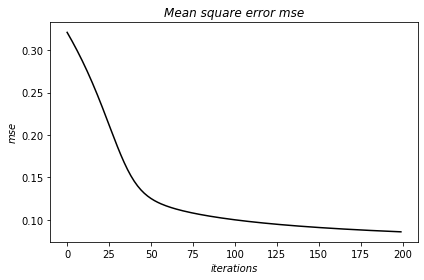

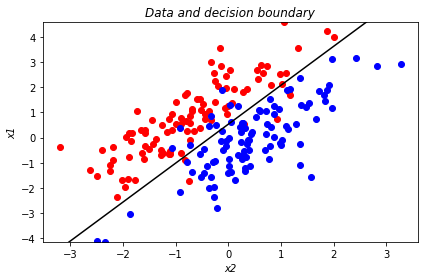

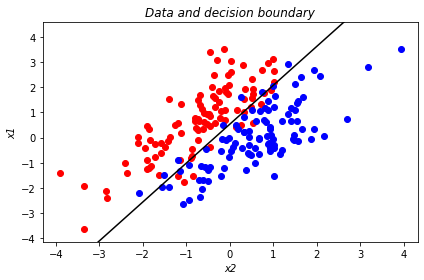

Machalanobis distance between classes:  2.7 


In [3]:
if __name__ == "__main__":

    #------------------------------------------------------
    #Parameters data
    #------------------------------------------------------
   
    #parameters for perceptron training
    niu = 0.2 # learning Rate
    epochs = 200
    
    N_train=100 # number of training samples
    N_test=100 # number of testing samples
    
    #parameters for data generation
    #two dimensional Gaussian distribution  
    mean1 = np.array([-0.5, 1])  #  mean vector class 1
    mean2 = np.array([0.5, 0])   #  mean vector class 2
    var1=1 # variance of x1 feature 
    var2=2 # variance of x2 feature 
    cor12=0.8 #correlation coefficient between x1 and x2
    
    #------------------------------------------------------
    #Data generation
    #------------------------------------------------------
       
    cov12=cor12*math.sqrt(var1)*math.sqrt(var2) #covariance
    cov1 = np.array([[var1, cov12], [cov12, var2]])  #  covariance matrix class 1
    cov2 = cov1  #  covariance matrix class 2
    data_train1 = np.random.multivariate_normal(mean1, cov1, N_train)
    data_train2 = np.random.multivariate_normal(mean2, cov2, N_train)
    targets_train1=np.zeros((N_train, 1))
    targets_train2=np.ones((N_train, 1))
    data_train=np.append(data_train1,data_train2, axis=0 )
    targets_train=np.append(targets_train1,targets_train2, axis=0 )
    
    data_test1 = np.random.multivariate_normal(mean1, cov1, N_test)
    data_test2 = np.random.multivariate_normal(mean2, cov2, N_test)
    targets_test1=np.zeros((N_test, 1))
    targets_test2=np.ones((N_test, 1))
    data_test=np.append(data_test1,data_test2, axis=0 )
    targets_test=np.append(targets_test1,targets_test2, axis=0 )
    
    #difference between means 
    mdiff=mean1-mean2
    #inversion of covariance matrix
    inv_cov1=np.linalg.inv(cov1)
    #np.array((mean1-mean2)).T - transpose of (mean1-mean2)  
    #np.array((mean1-mean2)).T
    m0=np.dot(mdiff,inv_cov1)
    mahalanobis_distance_square=np.dot(m0,mdiff)
    mahalanobis_distance=math.sqrt(mahalanobis_distance_square)
    
  
     
    #------------------------------------------------------
    #Single layer perceptron
    #------------------------------------------------------
    # perceptron call
    perceptron = Perceptron(data_train, targets_train) 
    #training
    mse=perceptron.train(epochs, niu) 
    #training errors
    [error_train, error_train_percent]=perceptron.errors(data_train, targets_train)
    print("Training errors: %3d" % (error_train))
    print("Training errors: %4.1f %%" % (error_train_percent))
    #testing errors
    [error_test, error_test_percent]=perceptron.errors(data_test, targets_test)
    print("Test errors: %3d" % (error_test))
    print("Test errors: %4.1f %%" % (error_test_percent))
    
        
    #plot mse and data
    perceptron.plot_mse() 
    perceptron.plot_data(data_train1, data_train2) 
    perceptron.plot_data(data_test1, data_test2) 
    print("Machalanobis distance between classes: %4.1f " % (mahalanobis_distance))

## Task 1.

Analyze what effect a number of training iterations has on the mse, training and testing errors. Explain the results.

Note: the new random data set will be generated  in every experiment.You can add additional  procedure to work with the same data (optional).It will enable you to compare the results in a correct way as you will work with the same data set.

**Your answer:**

## Task 2.

Analyze what effect a learning rate niu has on the mse, training and testing errors. Explain the results (niu>0).

**Your answer:**

## Task 3

Analyze what effect a training set size  has on the mse, training and testing errors. Explain the results.

**Your answer:**

## Task 4

Analyze what effect a distance between the classes has on the mse, training and testing errors. 
Distance between the classes is presented as Mahalanobis distance. The larger the distance, the better class separability is. 

Change the mean values and correlation coefficient of the classes:

mean1 = np.array([-0.5, 1])  #  mean vector class 2  
mean2 = np.array([0.5, 0])   #  covariance matrix class 2  
var1=1 # variance of x1 feature  
var2=2 # variance of x2 feature  
cor12=0.8 #correlation coefficient between x1 and x2  

You can also make the class covariance matrices cov1 and cov2 not equal.

**Your answer:**

## Task 5 (advanced)

Calculate the training and test errors fore each class. 

**Your answer:**